# Introduction to Cross Validation
A typical machine learning process involves training different models on the dataset and selecting the one with best performance. However, evaluating the performance of algorithm is not always a straight forward task. There are several factors that can help you determine which algorithm performance best. One such factor is the performance on cross validation set 

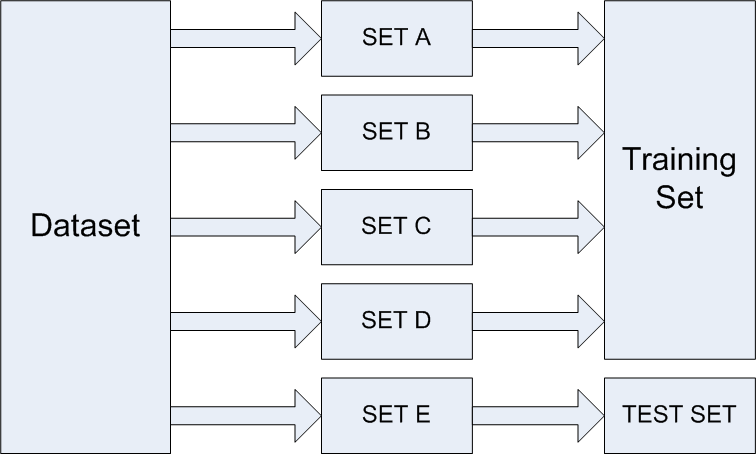

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\heart.csv")
data.head(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Splitting the dataset

In [26]:
train, test = train_test_split(data,random_state=42)
X_train = train[train.columns[2:13]]
y_train = train['target']
X_test = test[test.columns[2:13]] 
y_test = test['target']

## scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# Build the model

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

## Train the dataset using cross validation

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [30]:
print(accuracies)

[0.80434783 0.7826087  0.8        0.82222222 0.8       ]


In [31]:
print(accuracies.mean())

0.8018357487922705
